# Phase 2

## Problem Definition

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.

## Dataset

#### Give Me Some Credit

In this Model, credit scoring data sets from Kaggle 
called ‘Give me some credit’ is used to build classifiers. To evaluate
the classification performance of credit scoring model.

 (link for data). We will download the training dataset (cs-training.csv file) which will be used for models training and test data (cs-test.csv file) .

## Prepare Data

In this part, the data and variables is done. Target ratio, variables
values distributions are also be investigated. Null value analysis is done and null values in
variables, filled with statistical approach to prevent them to influence modelling in a bad
way.


After the describing inputs, missing values are also investigated, and for 2 inputs
(‘MonthlyIncome’ , ‘NumberOfDependents’) some missing values are observed. Handling
with missing values is very important to create accurate models, 


#### The variables in the following data set:
| Variable Name              | Description                                                                                                                                              | Type       |
| :- |-------------: | :-:
| SeriousDlqin2yrs                     | Person experienced 90 days past due delinquency or worse                                                                                                 | Y/N        |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits | percentage |
| age                                  | Age of borrower in years                                                                                                                                 | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years.                                                                  | integer    |
| DebtRatio                            | Monthly debt payments, alimony,living costs divided by monthy gross income                                                                               | percentage |
| MonthlyIncome                        | Monthly income                                                                                                                                           | real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)                                                     | integer    |
| NumberOfTimes90DaysLate              | Number of times borrower has been 90 days or more past due.                                                                                              | integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage and real estate loans including home equity lines of credit                                                                           | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years.                                                                  | integer    |
| NumberOfDependents                   | Number of dependents in family excluding themselves (spouse, children etc.)                                                                              | integer    |



## Python packages

## Step 1:Importing Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score,confusion_matrix, roc_curve, auc,classification_report, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



### Preprocessed data

Training model

In [63]:
train_data = pd.read_csv("cs-training.csv")
test_data = pd.read_csv("cs-test.csv")

## logistic-regression

In [64]:
#print columns headers of the dataset
train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [65]:
#drop lines with missing data (NA)
train_data.dropna(axis=1)
cols_with_missing = [col for col in train_data.columns
                         if train_data[col].isnull().any()]
reduced_train_data = train_data.drop(cols_with_missing, axis=1)
reduced_test_data = test_data.drop(cols_with_missing,axis=1)

In [66]:
reduced_train_data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

In [67]:
#specify the target variable
train_y = reduced_train_data.SeriousDlqin2yrs
test_y = reduced_test_data.SeriousDlqin2yrs

In [68]:
#create list of features
feature_names = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse']
#create data corresponding to the features
train_X = reduced_train_data[feature_names]
test_X = reduced_test_data[feature_names]

In [69]:
#review data
print(train_X.describe)
print(train_X.head)

<bound method NDFrame.describe of         RevolvingUtilizationOfUnsecuredLines  age  \
0                                   0.766127   45   
1                                   0.957151   40   
2                                   0.658180   38   
3                                   0.233810   30   
4                                   0.907239   49   
...                                      ...  ...   
149995                              0.040674   74   
149996                              0.299745   44   
149997                              0.246044   58   
149998                              0.000000   30   
149999                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
0                                          2     0.802982   
1                                          0     0.121876   
2                                          1     0.085113   
3                                          0     0.036050   
4                       

In [70]:
#split train data into train and test set. I am not sure if this is necessary, 
#because we have a train test separately, but I am not sure why my attempts to use it fail.
#So I am just trying to work by example form other notebooks

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.3, random_state = 0)

In [71]:
from sklearn.linear_model import LogisticRegression
#specify the model, set any numeric valye as parameter to ensure reproducibility 
credit_model = LogisticRegression(random_state=1)

#fit the model
credit_model.fit(x_train,y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [72]:
#make predictions
predictions_train = credit_model.predict(x_train)
y_pred = credit_model.predict(x_test)

In [73]:
#this section investigates resulting data, I had to do this because confusion matrix was throwing errors
print(predictions_train)
print(y_pred)
print(y_pred.shape)
print(y_pred.dtype)
print(y_test.shape)
print(y_test.dtype)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
(45000,)
int64
(45000,)
int64


In [74]:
#conver float to int
y_predi = y_pred.astype(int)

In [75]:
#create confuson matrics in text view
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix( y_test,y_predi).ravel()
(tn, fp, fn, tp)

(41858, 107, 2898, 137)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

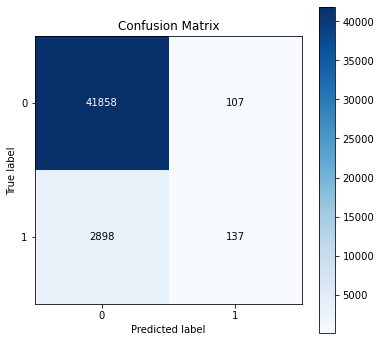

In [76]:
#create consusion matrix and plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))

In [77]:
from sklearn import metrics
#calculate ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predi)
print(fpr)
print(fpr.shape)
print(tpr)
print(tpr.shape)
print(thresholds)

[0.         0.00254974 1.        ]
(3,)
[0.         0.04514003 1.        ]
(3,)
[2 1 0]


In [78]:
from sklearn import metrics
#calculate AUC
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.5212951445573908


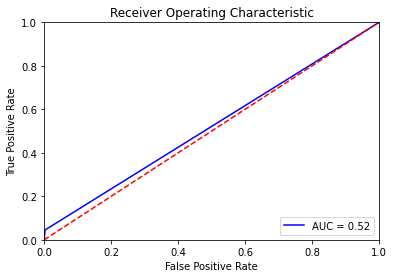

In [79]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
#calculate F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_predi) #do we need to use average=None as the third param?

0.0835620616041476

In [152]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predi) #do we need to use normalize=False as the third param?
form.append(['Logistic Regression',accuracy_score(y_test, y_predi)])

In [82]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test, y_predi)

0.5614754098360656

In [83]:
#recall
from sklearn.metrics import recall_score
recall_score(y_test, y_predi)

0.04514003294892916

In [84]:
#cost-sensitive accuracy
fp_cost = 1
fn_cost = 0
cost_sensitive_accuracy = (tp + tn) / (tp + tn + fp*fp_cost + fn*fn_cost)
print(cost_sensitive_accuracy)

0.9974585530378605


### Decision Tree

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.3, random_state = 0)

In [86]:
from sklearn.tree import DecisionTreeRegressor
#specify the model, set any numeric valye as parameter to ensure reproducibility 
credit_model = DecisionTreeRegressor(random_state=1)

#fit the model
credit_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [87]:
#make predictions
predictions_train = credit_model.predict(x_train)
y_pred = credit_model.predict(x_test)

In [88]:
#this section investigates resulting data, I had to do this because confusion matrix was throwing errors
print(predictions_train)
print(y_pred)
print(y_pred.shape)
print(y_pred.dtype)
print(y_test.shape)
print(y_test.dtype)

[0. 0. 0. ... 1. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]
(45000,)
float64
(45000,)
int64


In [89]:
#conver float to int
y_predi = y_pred.astype(int)

In [90]:
#create confuson matrics in text view
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix( y_test,y_predi).ravel()
(tn, fp, fn, tp)

(39576, 2389, 2230, 805)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

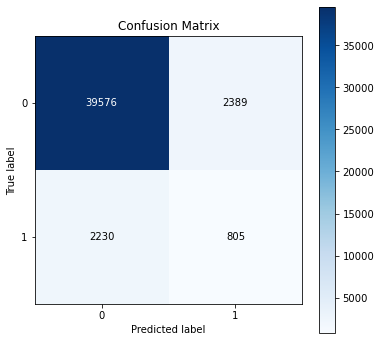

In [91]:
#create consusion matrix and plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_predi,figsize=(6,6))


In [92]:
from sklearn import metrics
#calculate ROC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predi)
print(fpr)
print(fpr.shape)
print(tpr)
print(tpr.shape)
print(thresholds)

[0.         0.05692839 1.        ]
(3,)
[0.         0.26523888 1.        ]
(3,)
[2 1 0]


In [93]:
from sklearn import metrics
#calculate AUC
roc_auc = metrics.auc(fpr, tpr)

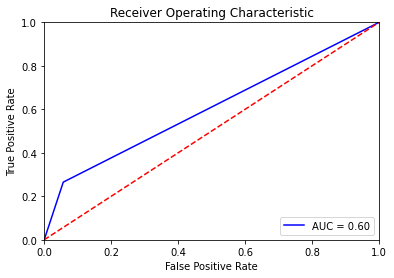

In [94]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
#calculate F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_predi) #do we need to use average=None as the third param?

0.2584684540054583

In [153]:
#accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predi) #do we need to use normalize=False as the third param?
form.append(['Decision Tree Classifier',accuracy_score(y_test, y_predi)])

In [97]:
#precision
from sklearn.metrics import precision_score
precision_score(y_test, y_predi)

0.252035065748278

In [98]:
#recall
from sklearn.metrics import recall_score
recall_score(y_test, y_predi)

0.2652388797364086

In [99]:
#cost-sensitive accuracy
fp_cost = 1
fn_cost = 0
cost_sensitive_accuracy = (tp + tn) / (tp + tn + fp*fp_cost + fn*fn_cost)
print(cost_sensitive_accuracy)

0.9441430909516015


## KNN

In [100]:
def BasedLine2(X_train, Y_train,models,scoring_type):
    # Test options and evaluation metric
    num_folds = 10
    scoring = scoring_type

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [101]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [102]:
from pandas import set_option

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [103]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)

In [104]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred


In [105]:
KNN_GridSearch = GridSearch(x_train,y_train,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(x_train)

Best: 0.935457 using {'n_neighbors': 15}


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import itertools
from sklearn.metrics import roc_auc_score

arglist = itertools.product(['uniform', 'distance'],['auto', 'ball_tree', 'kd_tree', 'brute'])

weight, algorithm, maxauc = '', '', 0
for wei, algo in arglist:
    knn = KNeighborsClassifier(weights=wei, algorithm=algo)
    knn.fit(x_test, y_test)
    y_pred = knn.predict_proba(x_train)[:,1]
    score = roc_auc_score(y_train, y_pred)
    # print(wei, algo, score)
    if score > maxauc:
        weight, algorithm, maxauc = wei, algo, score
print()
print("Auc", maxauc)


Auc 0.6634813687799149


In [107]:
scorelist = []
n_neighbors, maxauc = -1, 0
for k in range(100, 1000+1, 100):
    knn = KNeighborsClassifier(n_neighbors=k, weights=weight, algorithm=algorithm)
    knn.fit(x_train, y_train)
    y_pred = knn.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    print(k, score)
    if score > maxauc:
        n_neighbors, maxauc = k, score
    scorelist.append(score)
print()
print(n_neighbors, maxauc)

100 0.7738103200851263
200 0.7751732193867527
300 0.7679630334449493
400 0.7659123169048656
500 0.7605386068369913
600 0.754605974108415
700 0.7509551597383166
800 0.7484421414173693
900 0.7465714957019766
1000 0.7444922427903853

200 0.7751732193867527


In [108]:
scorelist = []
form = []
n_neighbors, maxauc = -1, 0
for k in range(320, 400+1, 10):
    knn = KNeighborsClassifier(n_neighbors=k, weights=weight, algorithm=algorithm)
    knn.fit(x_train,y_train)
    y_pred = knn.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test, y_pred)
    print(k, score)
    if score > maxauc:
        n_neighbors, maxauc = k, score
    scorelist.append(score)
print()
print(n_neighbors, maxauc)
form.append(['KNN_{}_{}_{}'.format(weight,algorithm,n_neighbors),maxauc])

320 0.7670545176601432
330 0.7665565424705731
340 0.766097919129674
350 0.7660482660787968
360 0.7663803895573919
370 0.7666684267170945
380 0.7665156006878723
390 0.7664145083639363
400 0.7659123169048656

320 0.7670545176601432


Text(0, 0.5, 'score(AUC)')

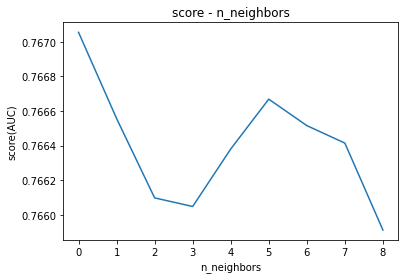

In [109]:
plt.plot(scorelist)
plt.title('score - n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('score(AUC)')

### Gaussian Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict_proba(x_test)[:,1]
score = roc_auc_score(y_test, y_pred)
print(score)

form.append(['GaussianNB',score])

0.7097319979719509


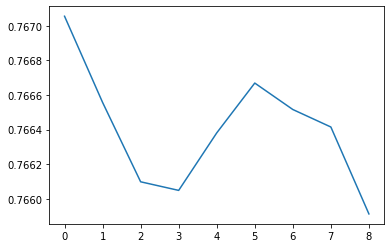

In [137]:
import matplotlib.pyplot as plt

plt.plot(scorelist)

## linearSVC

In [141]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
score = roc_auc_score(y_test, y_pred)
print(score)

form.append(['linearSVC',score])

0.5100588255962106


/usr/lib/python3/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [121]:
for iternum in [1000, 5000, 10000]:
    
    linear_svc = LinearSVC(max_iter=iternum,)
    linear_svc.fit(x_train, y_train)
    y_pred = linear_svc.predict(x_test)
    score = roc_auc_score(y_test, y_pred)
    print(score)



/usr/lib/python3/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5084471232106618


/usr/lib/python3/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5034394787685902
0.5107260482817819


/usr/lib/python3/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


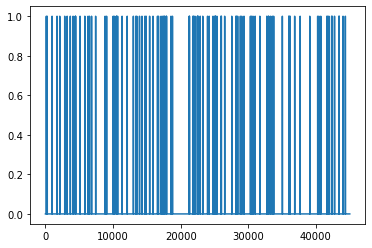

In [129]:
import matplotlib.pyplot as plt

plt.plot(y_pred)

In [158]:
form.sort(key=lambda x:x[1],reverse=True)
form

[['linearSVC', 0.8973555555555556],
 ['linearSVC', 0.8973555555555556],
 ['DTC', 0.8973555555555556],
 ['Logistic Regression', 0.8973555555555556],
 ['Decision Tree Classifier', 0.8973555555555556],
 ['KNN_uniform_brute_320', 0.7670545176601432],
 ['GaussianNB', 0.7097319979719509],
 ['linearSVC', 0.5100588255962106]]

In [159]:
fm = pd.DataFrame(form,columns=['Model','Accuracy'])
fm

,Model,Accuracy
0,linearSVC,0.897356
1,linearSVC,0.897356
2,DTC,0.897356
3,Logistic Regression,0.897356
4,Decision Tree Classifier,0.897356
5,KNN_uniform_brute_320,0.767055
6,GaussianNB,0.709732
7,linearSVC,0.510059


### Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

grid = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators':[30,50,80,100,200]
    },
    scoring='roc_auc',
    verbose=3
)
grid.fit(x_test, y_test)

for result in grid.cv_results_:
    print(result, grid.cv_results_[result])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... n_estimators=30, score=0.794, total=   0.9s
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ..................... n_estimators=30, score=0.799, total=   0.9s
[CV] n_estimators=30 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV] ..................... n_estimators=30, score=0.815, total=   1.0s
[CV] n_estimators=30 .................................................
[CV] ..................... n_estimators=30, score=0.806, total=   0.9s
[CV] n_estimators=30 .................................................
[CV] ..................... n_estimators=30, score=0.820, total=   0.9s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.804, total=   1.6s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.807, total=   1.5s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.822, total=   1.5s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.819, total=   1.6s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.2min finished


mean_fit_time [0.89494553 1.49523287 2.43134017 3.01030741 5.81787372]
std_fit_time [0.01417189 0.04377054 0.07640108 0.08253853 0.18038917]
mean_score_time [0.04138584 0.06433372 0.09987755 0.12235599 0.23073015]
std_score_time [0.00132801 0.00180837 0.00138406 0.00328092 0.00249992]
param_n_estimators [30 50 80 100 200]
params [{'n_estimators': 30}, {'n_estimators': 50}, {'n_estimators': 80}, {'n_estimators': 100}, {'n_estimators': 200}]
split0_test_score [0.79446059 0.80410609 0.81909701 0.82271225 0.82600557]
split1_test_score [0.799087   0.80726211 0.81675961 0.81701606 0.8236558 ]
split2_test_score [0.8148088  0.82195487 0.82661347 0.8326509  0.83139986]
split3_test_score [0.80580222 0.81861277 0.83192336 0.83227894 0.83469426]
split4_test_score [0.8196108  0.82809427 0.83230249 0.83778463 0.84089883]
mean_test_score [0.80675388 0.81600602 0.82533919 0.82848856 0.83133087]
std_test_score [0.00939142 0.00901525 0.00641929 0.00752453 0.0061665 ]
rank_test_score [5 4 3 2 1]


In [167]:
rfc = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'])
rfc.fit(x_train, y_train)

# 在子验证集上测试
y_pred = rfc.predict_proba(x_test)[:,1]
score = roc_auc_score(y_test, y_pred)
print(score)

0.8316163171199974


In [168]:
form.append(['Random FOresr',score])

In [169]:
form

[['linearSVC', 0.8973555555555556],
 ['linearSVC', 0.8973555555555556],
 ['DTC', 0.8973555555555556],
 ['Logistic Regression', 0.8973555555555556],
 ['Decision Tree Classifier', 0.8973555555555556],
 ['KNN_uniform_brute_320', 0.7670545176601432],
 ['GaussianNB', 0.7097319979719509],
 ['linearSVC', 0.5100588255962106],
 ['Random FOresr', 0.8316163171199974]]